# <div style="text-align:center;color:red;">pandas基本操作</div>

pandas官网，直接百度 "pandas官网" 即可得到

https://pandas.pydata.org/

series，只是一个一维数据结构，它由index和value组成。

dataframe，是一个二维结构，除了拥有index和value之外，还拥有column。

NumPy：大数据量的纯粹数组处理，以及复杂函数和线性代数等

Pandas：处理非纯粹的、混杂数组

虽然NumPy有着以上的种种出色的特性，其本身则难以独支数据分析这座大厦，这是一方面是由于NumPy几乎仅专注于数组处理，
另一方面则是数据分析牵涉到的数据特性众多，需要处理各种表格和混杂数据，远非纯粹的数组（NumPy）方便解决的，而这就是pandas发力的地方。

In [1]:
# pandas库一般搭配numpy库使用
import pandas as pd
import numpy as np
s = pd.Series([1,3,6,np.nan,44,1])
print(s)


0     1.0
1     3.0
2     6.0
3     NaN
4    44.0
5     1.0
dtype: float64


In [4]:
dates = pd.date_range("20200703",periods=6)
print(dates)

DatetimeIndex(['2020-07-03', '2020-07-04', '2020-07-05', '2020-07-06',
               '2020-07-07', '2020-07-08'],
              dtype='datetime64[ns]', freq='D')


In [6]:
# index表示是行的序列，columns表示是列的序列
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=["a","b","c","d"])
print(df)

                   a         b         c         d
2020-07-03  0.400449 -1.020541  1.923095  1.550324
2020-07-04 -0.733878 -0.584060 -0.844641 -0.404814
2020-07-05 -1.391202 -0.903147 -0.704307  1.429041
2020-07-06  0.941583 -0.205133  0.863580 -0.206818
2020-07-07  0.199599 -0.513916  0.321358 -0.358787
2020-07-08  0.000444 -0.309331  2.255741  1.169137


In [7]:
df2 = pd.DataFrame({"A":1.,
                    "B":pd.Timestamp("20200703"),
                    "C":pd.Series(1,index=list(range(4)),dtype="float32"),
                    "D":np.array([3]*4,dtype='int32'),
                    "E":pd.Categorical(["test","train","test","train"]),
                    "F":"foo"})
print(df2)

     A          B    C  D      E    F
0  1.0 2020-07-03  1.0  3   test  foo
1  1.0 2020-07-03  1.0  3  train  foo
2  1.0 2020-07-03  1.0  3   test  foo
3  1.0 2020-07-03  1.0  3  train  foo


In [8]:
print(df2.dtypes)

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object


In [10]:
# 输出所有index
print(df2.index)

Int64Index([0, 1, 2, 3], dtype='int64')


In [13]:
# 输出所有columns
print(df2.columns)

Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object')


In [14]:
# 打印值
print(df2.values)

[[1.0 Timestamp('2020-07-03 00:00:00') 1.0 3 'test' 'foo']
 [1.0 Timestamp('2020-07-03 00:00:00') 1.0 3 'train' 'foo']
 [1.0 Timestamp('2020-07-03 00:00:00') 1.0 3 'test' 'foo']
 [1.0 Timestamp('2020-07-03 00:00:00') 1.0 3 'train' 'foo']]


In [15]:
# 描述信息
# 只能运行数字类型的列
print(df2.describe())

         A    C    D
count  4.0  4.0  4.0
mean   1.0  1.0  3.0
std    0.0  0.0  0.0
min    1.0  1.0  3.0
25%    1.0  1.0  3.0
50%    1.0  1.0  3.0
75%    1.0  1.0  3.0
max    1.0  1.0  3.0


In [16]:
# 转置
print(df2.T)

                     0                    1                    2  \
A                    1                    1                    1   
B  2020-07-03 00:00:00  2020-07-03 00:00:00  2020-07-03 00:00:00   
C                    1                    1                    1   
D                    3                    3                    3   
E                 test                train                 test   
F                  foo                  foo                  foo   

                     3  
A                    1  
B  2020-07-03 00:00:00  
C                    1  
D                    3  
E                train  
F                  foo  


In [17]:
# 排序
# axis=1 对列排序
df3 = df2.sort_index(axis=1,ascending=False)
print(df3)

     F      E  D    C          B    A
0  foo   test  3  1.0 2020-07-03  1.0
1  foo  train  3  1.0 2020-07-03  1.0
2  foo   test  3  1.0 2020-07-03  1.0
3  foo  train  3  1.0 2020-07-03  1.0


In [18]:
# 排序
# 对行排序
df3 = df2.sort_index(axis=0,ascending=False)
print(df3)

     A          B    C  D      E    F
3  1.0 2020-07-03  1.0  3  train  foo
2  1.0 2020-07-03  1.0  3   test  foo
1  1.0 2020-07-03  1.0  3  train  foo
0  1.0 2020-07-03  1.0  3   test  foo


In [19]:
# 按照里面的value 进行排序
df3 = df2.sort_values(by="E")
print(df3)

     A          B    C  D      E    F
0  1.0 2020-07-03  1.0  3   test  foo
2  1.0 2020-07-03  1.0  3   test  foo
1  1.0 2020-07-03  1.0  3  train  foo
3  1.0 2020-07-03  1.0  3  train  foo


## pandas选取数据

In [20]:
dates = pd.date_range("20200703",periods=6)
df = pd.DataFrame(np.arange(24).reshape(6,4),index=dates,columns=["a","b","c","d"])
print(df)

             a   b   c   d
2020-07-03   0   1   2   3
2020-07-04   4   5   6   7
2020-07-05   8   9  10  11
2020-07-06  12  13  14  15
2020-07-07  16  17  18  19
2020-07-08  20  21  22  23


In [21]:
# 访问某列
print(df["a"])
print("=====================")
print(df.a)

2020-07-03     0
2020-07-04     4
2020-07-05     8
2020-07-06    12
2020-07-07    16
2020-07-08    20
Freq: D, Name: a, dtype: int32
2020-07-03     0
2020-07-04     4
2020-07-05     8
2020-07-06    12
2020-07-07    16
2020-07-08    20
Freq: D, Name: a, dtype: int32


In [23]:
print(df[0:3])
print("=====================")
print(df["2020-07-03":"2020-07-05"])

            a  b   c   d
2020-07-03  0  1   2   3
2020-07-04  4  5   6   7
2020-07-05  8  9  10  11
            a  b   c   d
2020-07-03  0  1   2   3
2020-07-04  4  5   6   7
2020-07-05  8  9  10  11


In [24]:
#select by label:loc
# 筛选行数据
print(df.loc["2020-07-03"])

a    0
b    1
c    2
d    3
Name: 2020-07-03 00:00:00, dtype: int32


In [26]:
# 筛选列数据
print(df)
print(df.loc[:,["a","b"]])

             a   b   c   d
2020-07-03   0   1   2   3
2020-07-04   4   5   6   7
2020-07-05   8   9  10  11
2020-07-06  12  13  14  15
2020-07-07  16  17  18  19
2020-07-08  20  21  22  23
             a   b
2020-07-03   0   1
2020-07-04   4   5
2020-07-05   8   9
2020-07-06  12  13
2020-07-07  16  17
2020-07-08  20  21


In [29]:
# 同时选行列
print(df.loc["2020-07-03",["a","b"]])

a    0
b    1
Name: 2020-07-03 00:00:00, dtype: int32


In [33]:
# 选择具体的位置 select by position: iloc
# 打印第三行的数据
print(df.iloc[3])
# 打印第三行第一个
print("=====================")
print(df.iloc[3,1])
# 切片
print("=====================")
print(df.iloc[3:5,1:4])


a    12
b    13
c    14
d    15
Name: 2020-07-06 00:00:00, dtype: int32
13
             b   c   d
2020-07-06  13  14  15
2020-07-07  17  18  19


In [34]:
# 不连续筛选
print(df.iloc[[1,3,5],1:4])

             b   c   d
2020-07-04   5   6   7
2020-07-06  13  14  15
2020-07-08  21  22  23


In [37]:
# 筛选 Boolean indexing
# 筛选 a > 8 的行
print(df)
print("=====================")
print(df[df.a>8])

             a   b   c   d
2020-07-03   0   1   2   3
2020-07-04   4   5   6   7
2020-07-05   8   9  10  11
2020-07-06  12  13  14  15
2020-07-07  16  17  18  19
2020-07-08  20  21  22  23
             a   b   c   d
2020-07-06  12  13  14  15
2020-07-07  16  17  18  19
2020-07-08  20  21  22  23


## padas 设置值

In [2]:
dates = pd.date_range("20200703",periods=6)
df = pd.DataFrame(np.arange(24).reshape(6,4),index=dates,columns=["a","b","c","d"])
print(df)

             a   b   c   d
2020-07-03   0   1   2   3
2020-07-04   4   5   6   7
2020-07-05   8   9  10  11
2020-07-06  12  13  14  15
2020-07-07  16  17  18  19
2020-07-08  20  21  22  23


In [3]:
# 直接设置值
df.iloc[2,2]=67
print(df)


             a   b   c   d
2020-07-03   0   1   2   3
2020-07-04   4   5   6   7
2020-07-05   8   9  67  11
2020-07-06  12  13  14  15
2020-07-07  16  17  18  19
2020-07-08  20  21  22  23


In [4]:
# 以标签的形式来改，先找到标签，然后改了
df.loc["2020-07-06","d"]=55
print(df)

             a   b   c   d
2020-07-03   0   1   2   3
2020-07-04   4   5   6   7
2020-07-05   8   9  67  11
2020-07-06  12  13  14  55
2020-07-07  16  17  18  19
2020-07-08  20  21  22  23


In [5]:
df[df.a>10]=0
print(df)

            a  b   c   d
2020-07-03  0  1   2   3
2020-07-04  4  5   6   7
2020-07-05  8  9  67  11
2020-07-06  0  0   0   0
2020-07-07  0  0   0   0
2020-07-08  0  0   0   0


In [7]:
# 只想处理a这一列
dates = pd.date_range("20200703",periods=6)
df = pd.DataFrame(np.arange(24).reshape(6,4),index=dates,columns=["a","b","c","d"])
print(df)
df.a[df.a>10]=0
print(df)

             a   b   c   d
2020-07-03   0   1   2   3
2020-07-04   4   5   6   7
2020-07-05   8   9  10  11
2020-07-06  12  13  14  15
2020-07-07  16  17  18  19
2020-07-08  20  21  22  23
            a   b   c   d
2020-07-03  0   1   2   3
2020-07-04  4   5   6   7
2020-07-05  8   9  10  11
2020-07-06  0  13  14  15
2020-07-07  0  17  18  19
2020-07-08  0  21  22  23


In [8]:
# 增加一个行
# 真的就非常像一般数组的操作，比如js、php等
df['e'] = np.nan
print(df)

            a   b   c   d   e
2020-07-03  0   1   2   3 NaN
2020-07-04  4   5   6   7 NaN
2020-07-05  8   9  10  11 NaN
2020-07-06  0  13  14  15 NaN
2020-07-07  0  17  18  19 NaN
2020-07-08  0  21  22  23 NaN


In [9]:
# 增加有数据的一行，需要对齐
df['f'] = pd.Series([1,2,3,4,5,6],index=pd.date_range("20200703",periods=6))
print(df)



            a   b   c   d   e  f
2020-07-03  0   1   2   3 NaN  1
2020-07-04  4   5   6   7 NaN  2
2020-07-05  8   9  10  11 NaN  3
2020-07-06  0  13  14  15 NaN  4
2020-07-07  0  17  18  19 NaN  5
2020-07-08  0  21  22  23 NaN  6


## pandas 处理丢失数据

In [10]:
dates = pd.date_range("20200703",periods=6)
df = pd.DataFrame(np.arange(24).reshape(6,4),index=dates,columns=["a","b","c","d"])
df.iloc[0,1] = np.nan
df.iloc[1,2] = np.nan
print(df)


             a     b     c   d
2020-07-03   0   NaN   2.0   3
2020-07-04   4   5.0   NaN   7
2020-07-05   8   9.0  10.0  11
2020-07-06  12  13.0  14.0  15
2020-07-07  16  17.0  18.0  19
2020-07-08  20  21.0  22.0  23


In [ ]:
# 处理方式一，丢掉数据
# 丢行
print(df.dropna())


In [13]:
# 丢列
print(df.dropna(axis=1))


             a   d
2020-07-03   0   3
2020-07-04   4   7
2020-07-05   8  11
2020-07-06  12  15
2020-07-07  16  19
2020-07-08  20  23


In [15]:
# fillna，填充为NaN的数据
print(df.fillna(value=0))
# 把为nan位置的数据填成0

             a     b     c   d
2020-07-03   0   0.0   2.0   3
2020-07-04   4   5.0   0.0   7
2020-07-05   8   9.0  10.0  11
2020-07-06  12  13.0  14.0  15
2020-07-07  16  17.0  18.0  19
2020-07-08  20  21.0  22.0  23


In [16]:
# isnull判断是否确实数据
print(df.isnull())

                a      b      c      d
2020-07-03  False   True  False  False
2020-07-04  False  False   True  False
2020-07-05  False  False  False  False
2020-07-06  False  False  False  False
2020-07-07  False  False  False  False
2020-07-08  False  False  False  False


In [18]:
# 判断是否缺失数据
# np.any判断是否有true
print(np.any(df.isnull()) == True)

True


## pandas 导入导出

pandas可以导入常见的各种类型的文件，比如 cvs、txt、json、excel、spss、sql等等

panda的文件的读取和保存的格式非常统一，比如读csv格式，读的话就是pd.read_csv("data.csv")，存的话就是data.to_csv("data1.csv")

这里可以查看：
https://pandas.pydata.org/docs/user_guide/io.html

In [21]:
# 读csv文件格式
data = pd.read_csv("data.csv")
print(data)


  name  age  gender
0  孙悟空   32    male
1  蜘蛛精   11  famale
2  沙和尚   12    male


In [22]:
# 存csv文件
# 要保存为什么格式，就调用to什么格式的方法即可
data.to_csv("data1.csv")

## pandas 合并 concat

可以各种横向纵向来合并dataframe

In [23]:
import pandas as pd
import numpy as np
df1 = pd.DataFrame(np.ones((3,4))*0,columns=["a","b","c","d"])
df2 = pd.DataFrame(np.ones((3,4))*1,columns=["a","b","c","d"])
df3 = pd.DataFrame(np.ones((3,4))*2,columns=["a","b","c","d"])
print(df1)
print(df2)
print(df3)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
     a    b    c    d
0  1.0  1.0  1.0  1.0
1  1.0  1.0  1.0  1.0
2  1.0  1.0  1.0  1.0
     a    b    c    d
0  2.0  2.0  2.0  2.0
1  2.0  2.0  2.0  2.0
2  2.0  2.0  2.0  2.0


In [24]:
# 上下合并
# axis=0表示纵向合并，axis=0表示横向合并，
res = pd.concat([df1,df2,df3],axis=0)
print(res)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
0  1.0  1.0  1.0  1.0
1  1.0  1.0  1.0  1.0
2  1.0  1.0  1.0  1.0
0  2.0  2.0  2.0  2.0
1  2.0  2.0  2.0  2.0
2  2.0  2.0  2.0  2.0


In [26]:
# 忽略索引之后，索引重新生成
res = pd.concat([df1,df2,df3],axis=0,ignore_index=True)
print(res)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0
5  1.0  1.0  1.0  1.0
6  2.0  2.0  2.0  2.0
7  2.0  2.0  2.0  2.0
8  2.0  2.0  2.0  2.0


In [29]:
# join,["inner","outer"]
# 就像数据库数据的连接一样
df1 = pd.DataFrame(np.ones((3,4))*0,columns=["a","b","c","d"],index=[1,2,3])
df2 = pd.DataFrame(np.ones((3,4))*1,columns=["b","c","d","e"],index=[2,3,4])
print(df1)
print(df2)


     a    b    c    d
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  0.0  0.0  0.0  0.0
     b    c    d    e
2  1.0  1.0  1.0  1.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0


In [31]:
# 直接 concat 合并
# 因为这样默认的join的处理方式就是 outer
# res = pd.concat([df1,df2],axis=0)
res = pd.concat([df1,df2],axis=0,join="outer")
print(res)
# 结果显然不是我们想要的

     a    b    c    d    e
1  0.0  0.0  0.0  0.0  NaN
2  0.0  0.0  0.0  0.0  NaN
3  0.0  0.0  0.0  0.0  NaN
2  NaN  1.0  1.0  1.0  1.0
3  NaN  1.0  1.0  1.0  1.0
4  NaN  1.0  1.0  1.0  1.0


In [33]:
# inner方式就是把两个都有的裁剪下来
# inner是交集，outer是并集
res = pd.concat([df1,df2],axis=0,join="inner",ignore_index=True)
print(res)

     b    c    d
0  0.0  0.0  0.0
1  0.0  0.0  0.0
2  0.0  0.0  0.0
3  1.0  1.0  1.0
4  1.0  1.0  1.0
5  1.0  1.0  1.0


## pandas 合并 merge

In [34]:
left = pd.DataFrame({"key":["k0","k1","k2"],"a":["a1","a2","a3"],"b":["b1","b2","b3"]})
right = pd.DataFrame({"key":["k0","k1","k2"],"c":["c1","c2","c3"],"d":["d1","d2","d3"]})
print(left)
print(right)

  key   a   b
0  k0  a1  b1
1  k1  a2  b2
2  k2  a3  b3
  key   c   d
0  k0  c1  d1
1  k1  c2  d2
2  k2  c3  d3


In [35]:
# 感觉就是非常非常像数据库的这一套操作
res = pd.merge(left,right,on="key")
print(res)

  key   a   b   c   d
0  k0  a1  b1  c1  d1
1  k1  a2  b2  c2  d2
2  k2  a3  b3  c3  d3


## pandas plot 图表

0      -0.821543
1      -1.400969
2      -1.063937
3      -1.271283
4      -1.722325
         ...    
995    -9.708325
996   -10.147374
997    -9.416161
998   -10.717159
999    -9.965055
Length: 1000, dtype: float64


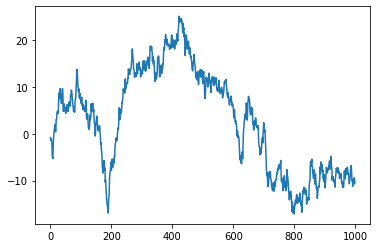

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.Series(np.random.randn(1000))
data = data.cumsum()
print(data)
data.plot()
plt.show()


             A          B          C          D
0    -1.376840   0.332067   0.780854  -2.224115
1    -0.737247   0.327831  -0.144637  -2.784555
2    -0.814113  -0.253493  -0.443814  -0.739176
3    -1.139643  -2.647939   0.570177  -2.385832
4    -3.177548  -2.932269  -0.179243  -1.278837
..         ...        ...        ...        ...
995 -35.318600  18.092235 -67.395662 -32.008234
996 -37.228967  19.120680 -65.007778 -32.824829
997 -38.168278  18.060445 -66.075966 -32.187316
998 -38.599118  18.165318 -65.261910 -32.813513
999 -38.561740  16.318049 -65.822558 -33.280435

[1000 rows x 4 columns]


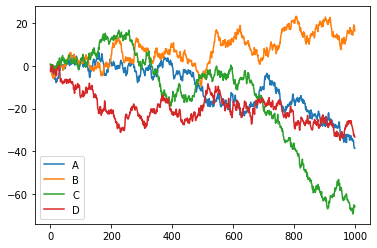

In [49]:
# 这里不能用 pd.Series
data = pd.DataFrame(np.random.randn(1000,4),index=np.arange(1000),columns=list("ABCD"))
data = data.cumsum()
print(data)
data.plot()
plt.show()